<a href="https://colab.research.google.com/github/g-roger/comparativo-algoritmos-ml/blob/main/Comparativo_Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn_extensions

  Created wheel for sklearn-extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24578 sha256=93f80666549497d7a71fa1f451e086e06b3db84af2ac5a54e2a517a2db0acbcb
  Stored in directory: /root/.cache/pip/wheels/2b/a8/2c/b8896a9d6768f168eeaa54289c35bc36d6b1ba0c5b99c9cc84
Successfully built sklearn-extensions



Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 0.6909 - binary_accuracy: 0.6000
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6861 - binary_accuracy: 0.7167
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - los

AttributeError: ignored

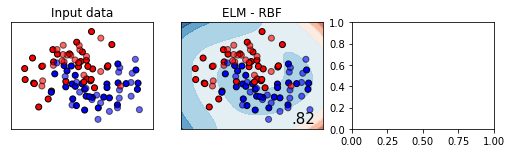

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.
"""
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import backend as K
from keras import metrics
from keras import regularizers
from tensorflow.python.client import device_lib

from xgboost import XGBClassifier

#pip install sklearn-extensions
from sklearn_extensions.extreme_learning_machines.elm import GenELMClassifier
from sklearn_extensions.extreme_learning_machines.random_layer import RBFRandomLayer, MLPRandomLayer
#conda install -c anaconda tensorflow-gpu

#Quantidade de Camadas Escondidas padrão
nh = 10

h = .02  # step size in the mesh

#Cria camada aleatório com função de ativação RBF 
srhl_rbf = RBFRandomLayer(n_hidden=nh*2, rbf_width=0.1, random_state=0)

names = ["ELM - RBF","Keras-MLP","Nearest Neighbors", "RBF SVM", 
         "Decision Tree", "Random Forest",
         #"Neural Net - ReLU e Adam"
         "XGBoost",
         "Naive Bayes" ]

# kernel_regularizer=regularizers.l2(0.2))
#, kernel_regularizer=regularizers.l2(0.01)
kmlp = Sequential()
kmlp.add(Dense(8, input_dim=2, activation='relu',  kernel_initializer='normal'))
kmlp.add(Dense(128, activation='relu'))
kmlp.add(Dense(128, activation='relu'))
kmlp.add(Dense(1, activation='sigmoid'))
kmlp.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['binary_accuracy'])

classifiers = [
    GenELMClassifier(hidden_layer=srhl_rbf),
    kmlp,
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),    
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10),    
    #MLPClassifier(alpha=0.5, max_iter=30000, hidden_layer_sizes=200, activation='relu', solver='adam', verbose=True ),
    XGBClassifier(n_estimators=100),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.4, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable,
            make_circles( noise=0.05, random_state=3)
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        if name == "Keras-MLP":
            clf.fit(X_train, y_train, epochs=100, batch_size=10  )
        else:
            clf.fit(X_train, y_train)
        
        if name == "Keras-MLP":
            score = clf.evaluate(X_test, y_test) 
            score = score[1]
        else:
            score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
       
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        elif name == "Keras-MLP":
            #print(np.c_[xx.ravel(), yy.ravel()])
            aux = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])            
            Z =aux
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()
